# BUILDING THAT MACD

### Import Libraries and Dependencies

In [2]:
# Import libraries and dependencies
import os
import ccxt
import warnings
# import pyEX as p
import numpy as np
import pandas as pd
from pathlib import Path
from datetime import datetime
from dotenv import load_dotenv
import matplotlib.pyplot as plt


warnings.filterwarnings('ignore')
%matplotlib inline

### Import Environment Variables

In [3]:
# Load environment variables
load_dotenv()

# Import environment variables
kraken_public_key = os.getenv("KRAKEN_PUBLIC_KEY")
kraken_secret_key = os.getenv("KRAKEN_SECRET_KEY")

# Verify that environment variables were loaded
print(f"Kraken key data type: {type(kraken_public_key)}")
print(f"Kraken secren data type: {type(kraken_secret_key)}")

Kraken key data type: <class 'NoneType'>
Kraken secren data type: <class 'NoneType'>


### Set Public and Private Keys for Kraken Exchange via the CCXT library

In [4]:
# Set the public and private keys for the API
exchange = ccxt.kraken({
    'apiKey': kraken_public_key,
    'secret': kraken_secret_key,
})

### Connect to Kraken and Load Available Cyptocurrency Data

In [5]:
# Connect to Kraken and load the available cryptocurrencies
crypto_details = exchange.load_markets()
crypto_details['BTC/USD']['symbol']

'BTC/USD'

In [6]:
# Import data as a Pandas DataFrame
crypto_df = pd.DataFrame(crypto_details)

# Display sample data
crypto_df

,AAVE/AUD,AAVE/ETH,AAVE/EUR,AAVE/GBP,AAVE/USD,AAVE/BTC,ADA/AUD,ADA/ETH,ADA/EUR,ADA/GBP,...,YFI/USD,YFI/BTC,EUR/USD,GBP/USD,ZRX/EUR,ZRX/GBP,ZRX/USD,ZRX/BTC,USD/CAD,USD/JPY
percentage,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
tierBased,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
taker,0.0026,0.0026,0.0026,0.0026,0.0026,0.0026,0.0026,0.0026,0.0026,0.0026,...,0.0026,0.0026,0.002,0.002,0.0026,0.0026,0.0026,0.0026,0.002,0.0
maker,0.0016,0.0016,0.0016,0.0016,0.0016,0.0016,0.0016,0.0016,0.0016,0.0016,...,0.0016,0.0016,0.002,0.002,0.0016,0.0016,0.0016,0.0016,0.002,0.0
tiers,"{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...",...,"{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000..."
precision,"{'amount': 8, 'price': 2}","{'amount': 8, 'price': 4}","{'amount': 8, 'price': 2}","{'amount': 8, 'price': 2}","{'amount': 8, 'price': 2}","{'amount': 8, 'price': 6}","{'amount': 8, 'price': 5}","{'amount': 8, 'price': 7}","{'amount': 8, 'price': 6}","{'amount': 8, 'price': 5}",...,"{'amount': 8, 'price': 0}","{'amount': 8, 'price': 4}","{'amount': 8, 'price': 5}","{'amount': 8, 'price': 5}","{'amount': 8, 'price': 3}","{'amount': 8, 'price': 3}","{'amount': 8, 'price': 3}","{'amount': 8, 'price': 8}","{'amount': 8, 'price': 5}","{'amount': 8, 'price': 3}"
limits,"{'amount': {'min': 0.02, 'max': 100000000.0}, ...","{'amount': {'min': 0.02, 'max': 100000000.0}, ...","{'amount': {'min': 0.02, 'max': 100000000.0}, ...","{'amount': {'min': 0.02, 'max': 100000000.0}, ...","{'amount': {'min': 0.02, 'max': 100000000.0}, ...","{'amount': {'min': 0.02, 'max': 100000000.0}, ...","{'amount': {'min': 5.0, 'max': 100000000.0}, '...","{'amount': {'min': 5.0, 'max': 100000000.0}, '...","{'amount': {'min': 5.0, 'max': 100000000.0}, '...","{'amount': {'min': 5.0, 'max': 100000000.0}, '...",...,"{'amount': {'min': 0.00015, 'max': 100000000.0...","{'amount': {'min': 0.00015, 'max': 100000000.0...","{'amount': {'min': 5.0, 'max': 100000000.0}, '...","{'amount': {'min': 5.0, 'max': 100000000.0}, '...","{'amount': {'min': 5.0, 'max': 100000000.0}, '...","{'amount': {'min': 5.0, 'max': 100000000.0}, '...","{'amount': {'min': 5.0, 'max': 100000000.0}, '...","{'amount': {'min': 5.0, 'max': 100000000.0}, '...","{'amount': {'min': 10.0, 'max': 100000000.0}, ...","{'amount': {'min': 10.0, 'max': 100000000.0}, ..."
id,AAVEAUD,AAVEETH,AAVEEUR,AAVEGBP,AAVEUSD,AAVEXBT,ADAAUD,ADAETH,ADAEUR,ADAGBP,...,YFIUSD,YFIXBT,ZEURZUSD,ZGBPZUSD,ZRXEUR,ZRXGBP,ZRXUSD,ZRXXBT,ZUSDZCAD,ZUSDZJPY
symbol,AAVE/AUD,AAVE/ETH,AAVE/EUR,AAVE/GBP,AAVE/USD,AAVE/BTC,ADA/AUD,ADA/ETH,ADA/EUR,ADA/GBP,...,YFI/USD,YFI/BTC,EUR/USD,GBP/USD,ZRX/EUR,ZRX/GBP,ZRX/USD,ZRX/BTC,USD/CAD,USD/JPY
base,AAVE,AAVE,AAVE,AAVE,AAVE,AAVE,ADA,ADA,ADA,ADA,...,YFI,YFI,EUR,GBP,ZRX,ZRX,ZRX,ZRX,USD,USD


### List Available Cryptocurrencies for Trading

In [7]:
# Print column values of DataFrame
# print(type(crypto_df.columns.values))
# print(len(crypto_df.columns.values))
pairs = crypto_df.columns.values
pairs_df = pd.DataFrame(pairs, columns=['pairs'])
pairs_df.shape

(356, 1)

In [8]:
#Create numpy array identifying which pairs contain USDT pairs
usdt_bool_np = pairs_df.pairs.str.contains("/USDT")

# Add USDT numpy array boolean pairs to dataframe
pairs_df['USDT'] = usdt_bool_np

#remove pairs without USDT
pairs_df = pairs_df[pairs_df.USDT != False]

#reset the index, drop extraneous columns
pairs_df = pairs_df.reset_index()
pairs_df = pairs_df.drop(columns=['index', 'USDT'])

pairs_df

,pairs
0,ADA/USDT
1,BCH/USDT
2,DAI/USDT
3,DOT/USDT
4,EOS/USDT
5,ETH/USDT
6,LINK/USDT
7,LTC/USDT
8,USDC/USDT
9,BTC/USDT


### Fetch Historical Data for LINK/USDT

In [9]:
# Fetch daily candlestick bar data from `BTC/USD`
historical_prices = exchange.fetch_ohlcv("LINK/USDT", "1h")
historical_prices[2]

[1619964000000, 39.30508, 39.84153, 39.23683, 39.84153, 153.93316569]

In [10]:
# Import the data as a Pandas DataFrame and set the columns
historical_prices_df = pd.DataFrame(
    historical_prices, 
    columns=["timestamp", "open", "high", "low", "close", "volume"]
)

display(historical_prices_df.head())
display()
display("____________________________________")
display()
display(f"historical_prices_df shape: {historical_prices_df.shape}")

,timestamp,open,high,low,close,volume
0,1619956800000,39.74614,39.78000,39.59347,39.66800,1200.819593
1,1619960400000,39.41862,39.59094,39.29932,39.29932,148.100186
2,1619964000000,39.30508,39.84153,39.23683,39.84153,153.933166
3,1619967600000,39.56227,39.66358,39.38058,39.38058,1138.201782
4,1619971200000,39.33918,39.50100,39.17736,39.45000,634.871690


'____________________________________'

'historical_prices_df shape: (720, 6)'

### Convert Epoch Timestamp to Readable Date Format

In [11]:
# Convert epoch timestamp to date using the `to_datetime` function and `unit` parameter
historical_prices_df["date"] = pd.to_datetime(
    historical_prices_df["timestamp"], 
    unit="ms"
)

# UNIT ARGUEMENTS COULD INCLUDE: (ms,us,ns) 

display(historical_prices_df.head())
display("_________________________")
display(f"historical_prices_df shape: {historical_prices_df.shape}")

,timestamp,open,high,low,close,volume,date
0,1619956800000,39.74614,39.78000,39.59347,39.66800,1200.819593,2021-05-02 12:00:00
1,1619960400000,39.41862,39.59094,39.29932,39.29932,148.100186,2021-05-02 13:00:00
2,1619964000000,39.30508,39.84153,39.23683,39.84153,153.933166,2021-05-02 14:00:00
3,1619967600000,39.56227,39.66358,39.38058,39.38058,1138.201782,2021-05-02 15:00:00
4,1619971200000,39.33918,39.50100,39.17736,39.45000,634.871690,2021-05-02 16:00:00


'_________________________'

'historical_prices_df shape: (720, 7)'

In [12]:
historical_prices_df = historical_prices_df.set_index('date')
historical_prices_df

,timestamp,open,high,low,close,volume
date,,,,,,
2021-05-02 12:00:00,1619956800000,39.74614,39.78000,39.59347,39.66800,1200.819593
2021-05-02 13:00:00,1619960400000,39.41862,39.59094,39.29932,39.29932,148.100186
2021-05-02 14:00:00,1619964000000,39.30508,39.84153,39.23683,39.84153,153.933166
2021-05-02 15:00:00,1619967600000,39.56227,39.66358,39.38058,39.38058,1138.201782
2021-05-02 16:00:00,1619971200000,39.33918,39.50100,39.17736,39.45000,634.871690
...,...,...,...,...,...,...
2021-06-01 07:00:00,1622530800000,30.68889,30.68892,30.40129,30.65638,1055.010497
2021-06-01 08:00:00,1622534400000,30.72982,30.83993,29.23452,29.56691,4590.277355
2021-06-01 09:00:00,1622538000000,29.75210,29.84748,29.22099,29.69695,1747.938575


### Plot Daily Returns

In [13]:
# Drop NAs and calculate daily percent return
historical_prices_df['daily_return'] = historical_prices_df['close'].dropna().pct_change()
historical_prices_df

,timestamp,open,high,low,close,volume,daily_return
date,,,,,,,
2021-05-02 12:00:00,1619956800000,39.74614,39.78000,39.59347,39.66800,1200.819593,NaN
2021-05-02 13:00:00,1619960400000,39.41862,39.59094,39.29932,39.29932,148.100186,-0.009294
2021-05-02 14:00:00,1619964000000,39.30508,39.84153,39.23683,39.84153,153.933166,0.013797
2021-05-02 15:00:00,1619967600000,39.56227,39.66358,39.38058,39.38058,1138.201782,-0.011570
2021-05-02 16:00:00,1619971200000,39.33918,39.50100,39.17736,39.45000,634.871690,0.001763
...,...,...,...,...,...,...,...
2021-06-01 07:00:00,1622530800000,30.68889,30.68892,30.40129,30.65638,1055.010497,0.002343
2021-06-01 08:00:00,1622534400000,30.72982,30.83993,29.23452,29.56691,4590.277355,-0.035538
2021-06-01 09:00:00,1622538000000,29.75210,29.84748,29.22099,29.69695,1747.938575,0.004398


### Construct Exponential Moving Average of Closing Prices (Trading Signal, Feature One)

In [14]:
# Set short and long windows
short_window = 9
long_window = 20

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
historical_prices_df['fast_close'] = historical_prices_df['close'].ewm(halflife=short_window).mean()
historical_prices_df['slow_close'] = historical_prices_df['close'].ewm(halflife=long_window).mean()

# Construct a crossover trading signal
historical_prices_df['crossover_long'] = np.where(historical_prices_df['fast_close'] > historical_prices_df['slow_close'], 1.0, 0.0)
historical_prices_df['crossover_short'] = np.where(historical_prices_df['fast_close'] < historical_prices_df['slow_close'], -1.0, 0.0)
historical_prices_df['crossover_signal'] = historical_prices_df['crossover_long'] + historical_prices_df['crossover_short']

historical_prices_df.head()

,timestamp,open,high,low,close,volume,daily_return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal
date,,,,,,,,,,,,
2021-05-02 12:00:00,1619956800000,39.74614,39.78000,39.59347,39.66800,1200.819593,NaN,39.668000,39.668000,0.0,0.0,0.0
2021-05-02 13:00:00,1619960400000,39.41862,39.59094,39.29932,39.29932,148.100186,-0.009294,39.476565,39.480466,0.0,-1.0,-1.0
2021-05-02 14:00:00,1619964000000,39.30508,39.84153,39.23683,39.84153,153.933166,0.013797,39.607700,39.605015,1.0,0.0,1.0
2021-05-02 15:00:00,1619967600000,39.56227,39.66358,39.38058,39.38058,1138.201782,-0.011570,39.544202,39.545957,0.0,-1.0,-1.0
2021-05-02 16:00:00,1619971200000,39.33918,39.50100,39.17736,39.45000,634.871690,0.001763,39.522354,39.525413,0.0,-1.0,-1.0


### Plot Exponential Moving Average of Closing Prices

<AxesSubplot:xlabel='date'>

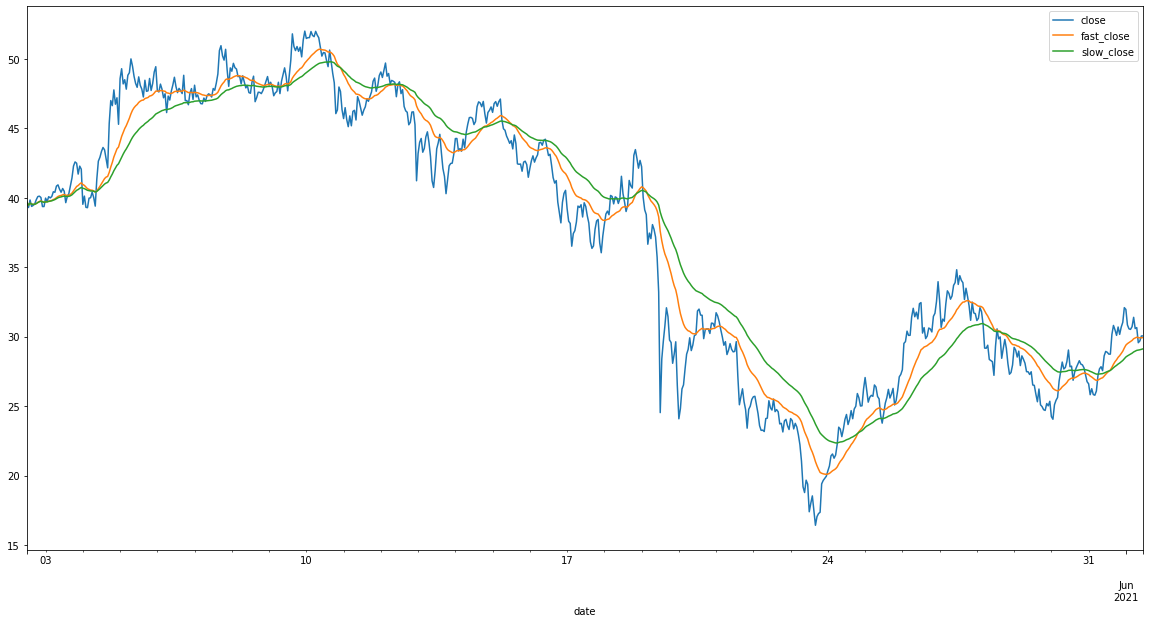

In [15]:
# Plot the EMA of BTC/USD closing prices
historical_prices_df[['close', 'fast_close', 'slow_close']].plot(figsize=(20,10))

### Construct Bollinger Band (Trading Signal, Feature Three)

In [16]:
# Set bollinger band window
bollinger_window = 20

# Calculate rolling mean and standard deviation
historical_prices_df['bollinger_mid_band'] = historical_prices_df['close'].rolling(window=bollinger_window).mean()
historical_prices_df['bollinger_std'] = historical_prices_df['close'].rolling(window=20).std()

# Calculate upper and lowers bands of bollinger band
historical_prices_df['bollinger_upper_band']  = historical_prices_df['bollinger_mid_band'] + (historical_prices_df['bollinger_std'] * 1)
historical_prices_df['bollinger_lower_band']  = historical_prices_df['bollinger_mid_band'] - (historical_prices_df['bollinger_std'] * 1)

# Calculate bollinger band trading signal
historical_prices_df['bollinger_long'] = np.where(historical_prices_df['close'] < historical_prices_df['bollinger_lower_band'], 1.0, 0.0)
historical_prices_df['bollinger_short'] = np.where(historical_prices_df['close'] > historical_prices_df['bollinger_upper_band'], -1.0, 0.0)
historical_prices_df['bollinger_signal'] = historical_prices_df['bollinger_long'] + historical_prices_df['bollinger_short']

historical_prices_df.head()

,timestamp,open,high,low,close,volume,daily_return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal
date,,,,,,,,,,,,,,,,,,,
2021-05-02 12:00:00,1619956800000,39.74614,39.78000,39.59347,39.66800,1200.819593,NaN,39.668000,39.668000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2021-05-02 13:00:00,1619960400000,39.41862,39.59094,39.29932,39.29932,148.100186,-0.009294,39.476565,39.480466,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2021-05-02 14:00:00,1619964000000,39.30508,39.84153,39.23683,39.84153,153.933166,0.013797,39.607700,39.605015,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2021-05-02 15:00:00,1619967600000,39.56227,39.66358,39.38058,39.38058,1138.201782,-0.011570,39.544202,39.545957,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2021-05-02 16:00:00,1619971200000,39.33918,39.50100,39.17736,39.45000,634.871690,0.001763,39.522354,39.525413,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0


### Plot Bollinger Bands

<AxesSubplot:xlabel='date'>

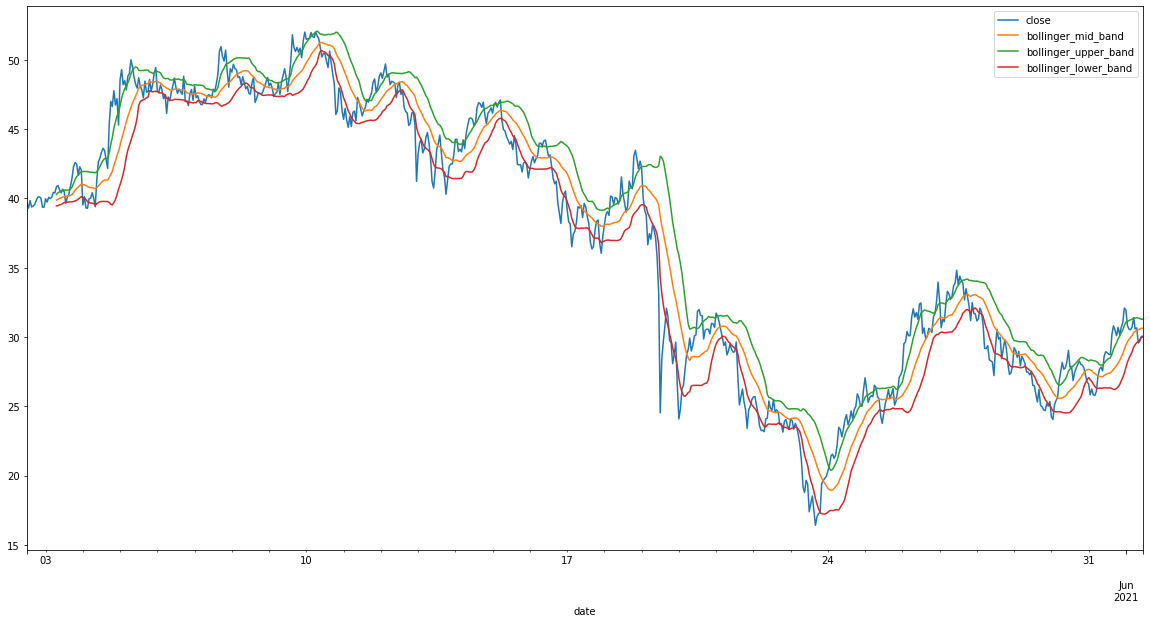

In [17]:
# Plot the Bollinger Bands for BTC/USD closing prices
historical_prices_df[['close','bollinger_mid_band','bollinger_upper_band','bollinger_lower_band']].plot(figsize=(20,10))

### Build MACD Signals

In [18]:
# Set short and long windows
mac_short_window = 12
mac_long_window = 26
signal_window = 9

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
historical_prices_df['mac_fast_close'] = historical_prices_df['close'].ewm(span=mac_short_window, adjust=False).mean()
historical_prices_df['mac_slow_close'] = historical_prices_df['close'].ewm(span=mac_long_window, adjust=False).mean()
# historical_prices_df['macd'] = historical_prices_df['fast_close'] - historical_prices_df['slow_close']

macd = historical_prices_df['mac_fast_close'] - historical_prices_df['mac_slow_close']
signal = macd.ewm(span=9, adjust=False).mean()

historical_prices_df['macd'] = macd
historical_prices_df['signal'] = signal



historical_prices_df.head()

,timestamp,open,high,low,close,volume,daily_return,fast_close,slow_close,crossover_long,...,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal,mac_fast_close,mac_slow_close,macd,signal
date,,,,,,,,,,,,,,,,,,,,,
2021-05-02 12:00:00,1619956800000,39.74614,39.78000,39.59347,39.66800,1200.819593,NaN,39.668000,39.668000,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,39.668000,39.668000,0.000000,0.000000
2021-05-02 13:00:00,1619960400000,39.41862,39.59094,39.29932,39.29932,148.100186,-0.009294,39.476565,39.480466,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,39.611280,39.640690,-0.029410,-0.005882
2021-05-02 14:00:00,1619964000000,39.30508,39.84153,39.23683,39.84153,153.933166,0.013797,39.607700,39.605015,1.0,...,NaN,NaN,NaN,0.0,0.0,0.0,39.646703,39.655567,-0.008864,-0.006479
2021-05-02 15:00:00,1619967600000,39.56227,39.66358,39.38058,39.38058,1138.201782,-0.011570,39.544202,39.545957,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,39.605761,39.635198,-0.029437,-0.011070
2021-05-02 16:00:00,1619971200000,39.33918,39.50100,39.17736,39.45000,634.871690,0.001763,39.522354,39.525413,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,39.581798,39.621480,-0.039682,-0.016793


<AxesSubplot:xlabel='date'>

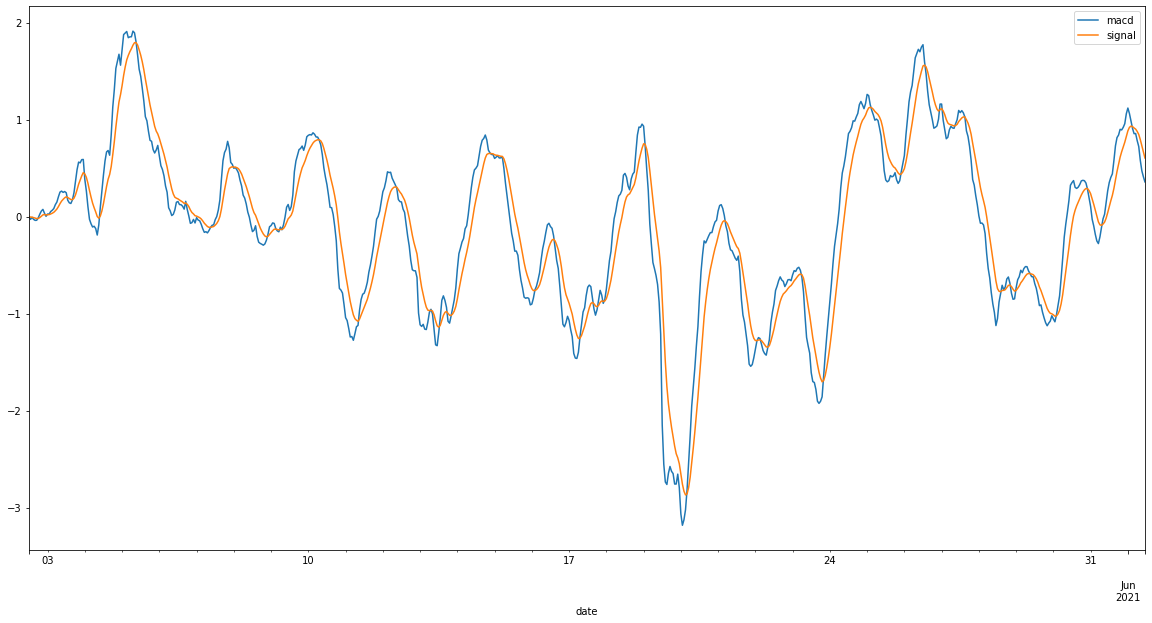

In [19]:
# historical_prices_df[['close','macd','macd_signal']].plot(figsize=(20,10))

historical_prices_df[['macd','signal']].plot(figsize=(20,10))

### Build RSI Signals

In [20]:
n = 14

def rma(x, n, y0):
    a = (n-1) / n
    ak = a**np.arange(len(x)-1, -1, -1)
    return np.r_[np.full(n, np.nan), y0, np.cumsum(ak * x) / ak / n + y0 * a**np.arange(1, len(x)+1)]

historical_prices_df['change'] = historical_prices_df['close'].diff()
historical_prices_df['gain'] = historical_prices_df.change.mask(historical_prices_df.change < 0, 0.0)
historical_prices_df['loss'] = -historical_prices_df.change.mask(historical_prices_df.change > 0, -0.0)
historical_prices_df['avg_gain'] = rma(historical_prices_df.gain[n+1:].to_numpy(), n, np.nansum(historical_prices_df.gain.to_numpy()[:n+1])/n)
historical_prices_df['avg_loss'] = rma(historical_prices_df.loss[n+1:].to_numpy(), n, np.nansum(historical_prices_df.loss.to_numpy()[:n+1])/n)
historical_prices_df['rs'] = historical_prices_df.avg_gain / historical_prices_df.avg_loss
historical_prices_df['rsi_14'] = 100 - (100 / (1 + historical_prices_df.rs))

historical_prices_df.tail()

,timestamp,open,high,low,close,volume,daily_return,fast_close,slow_close,crossover_long,...,mac_slow_close,macd,signal,change,gain,loss,avg_gain,avg_loss,rs,rsi_14
date,,,,,,,,,,,,,,,,,,,,,
2021-06-01 07:00:00,1622530800000,30.68889,30.68892,30.40129,30.65638,1055.010497,0.002343,29.962598,29.016024,1.0,...,29.961681,0.721975,0.846407,0.07167,0.07167,0.00000,0.261401,0.204227,1.279952,56.139434
2021-06-01 08:00:00,1622534400000,30.72982,30.83993,29.23452,29.56691,4590.277355,-0.035538,29.933268,29.034789,1.0,...,29.932439,0.579410,0.793008,-1.08947,0.00000,1.08947,0.242729,0.267459,0.907540,47.576446
2021-06-01 09:00:00,1622538000000,29.75210,29.84748,29.22099,29.69695,1747.938575,0.004398,29.915751,29.057345,1.0,...,29.914995,0.471485,0.728703,0.13004,0.13004,0.00000,0.234680,0.248354,0.944940,48.584532
2021-06-01 10:00:00,1622541600000,29.59709,30.21366,29.59709,30.05262,2251.524104,0.011977,29.925896,29.091248,1.0,...,29.925189,0.409927,0.664948,0.35567,0.35567,0.00000,0.243322,0.230615,1.055102,51.340617
2021-06-01 11:00:00,1622545200000,30.05262,30.05262,30.05262,30.05262,0.000000,0.000000,29.935290,29.123995,1.0,...,29.934629,0.357027,0.603364,0.00000,0.00000,-0.00000,0.225942,0.214142,1.055102,51.340617


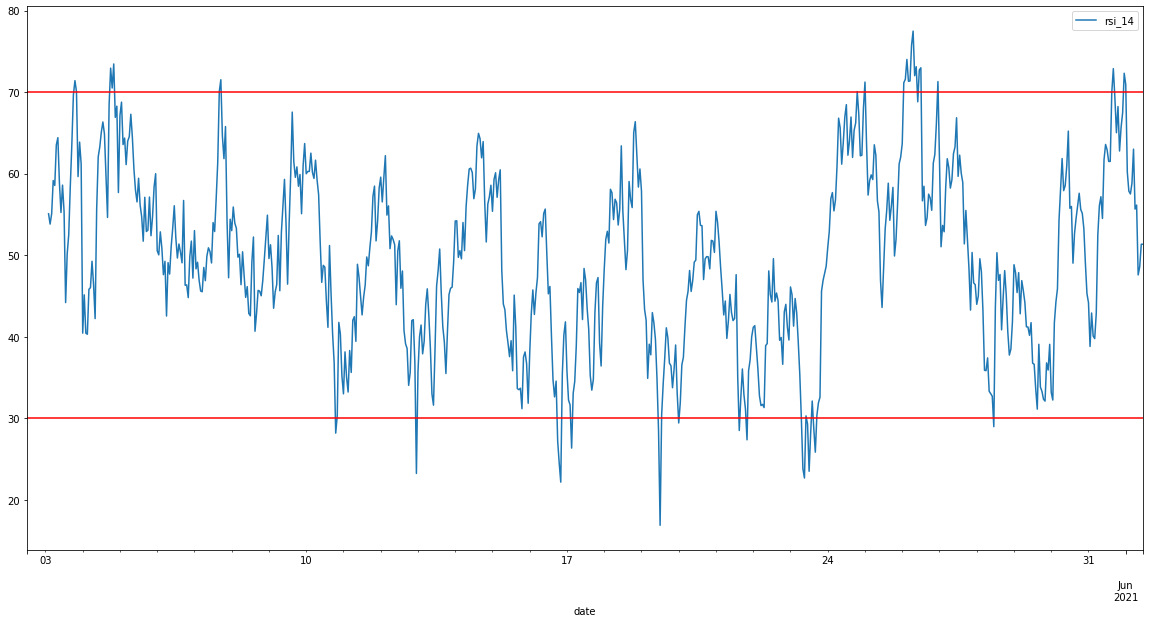

In [33]:
historical_prices_df[['rsi_14']].plot(figsize=(20,10))
plt.axhline(y=70, color='r', linestyle='-')
plt.axhline(y=30, color='r', linestyle='-')